# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-5-차이를 설명하는 통계모형-1-살충제-3 (64일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 차이를 설명하는 간단한 통계모형

## 이원분산분석 테스트  -- ANOVA


이전에 살충제 예제를 가지고 일원 분산 분석을 시행 하였습니다. 이번에는 간단하게 2개의 독립변수를 갖는 분산분석에 대해서 정리하도록 하겠습니다. 저번과 이번을 정리하고 이것을 일반화 하면 다원 분산 분석을 이해하기 쉬울 것 같습니다.

http://www.sthda.com/english/wiki/two-way-anova-test-in-r

### 이원분산분석 이란?

관심변수를 설명하는데, 두개의 독립변수가 동시적으로 영향을 주는 경우 분석 인 경우 이원 분산 분석을 이용합니다. 그룹하는 변수들을 factors 라고 하고 factors 에서 서로 다른 범주들을 levels (수준) 이라고 합니다. 각 factors 에서 수준끼리 결합된 것을 셀 (cell) 이라고 합니다.

### 이원 분산 분석 검정 영가설

이원 분산 분석에 대한 검정 영가설 

1. 범주형 변수 A 평균에 대한 차이점이 없다.
2. 범주형 변수 B 평균에 대한 차이점이 없다.
3. factors A, B 는 서로 독립적이다.

이에 대한 대립가설은 
1. 1), 2) 에 대한 대립가설은 평균들이 다르다.
2. 3) 에 대한 대립가설은 A, B 가 서로 종속적이다.


### 이원 분산 분석 검정에 대한 가정

다른 모든 분산 분석처럼 각 셀에 있는 관측값들은 정규 분포이고 등분산이어야 한다. 따라서 먼저 ANOVA 적용전에 이러한 가정이 맞는지 먼저 확인을 해야 합니다.

### 데이터 준비

다음 데이터는 기니피그의 치아 성장에 대한 비타민 C 의 영향 에 대한 조사 데이터 입니다. R 에 데이터가 준비 되어 있으며, 데이터는 ToothGrowth 입니다.

데이터는 60마리 기니피그의 상아질모세포 길이 입니다. (odontoblasts: 치아성장을 담당하는 세포). 기니피그는 3가지 비타민 C 용량 (0.5, 1, 2) 중에 하나를 복용하고 비타민 C 형태는 오렌지 쥬스 또는 아스코르빈산(비타민 C 형태로 코팅 VC 로 표시) 입니다.

In [2]:
my_data <- ToothGrowth
head(my_data)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


이것을 랜덤하게 데이터를 확인 하는 방법은 sample_n() 함수를 이용합니다. sample_n() 함수는 dplyr 패키지에 있습니다.

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
# 10 개의 데이터를 임의로 확인 해 봅니다.
set.seed(1234)
sample_n(my_data, 10)

,len,supp,dose
7,11.2,VC,0.5
37,8.2,OJ,0.5
36,10.0,OJ,0.5
58,27.3,OJ,2.0
49,14.5,OJ,1.0
57,26.4,OJ,2.0
1,4.2,VC,0.5
13,15.2,VC,1.0
35,14.5,OJ,0.5
27,26.7,VC,2.0


In [5]:
# 데이터 구조를 확인해 봅니다.
str(my_data)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


3개의 변수가 있습니다.  
* len : 기니피그 치아 모근
* supp : 복용 형태 OJ : 오렌지 주스, VC : 아스코르빈산
* dose : 용량 , 0.5, 1, 2 

dose 가 숫자로 되어 있으므로 범주형 변수로 변경을 해야 합니다. factor() 함수를 이용합니다.

In [6]:
# Convert dose as a factor and recode the levels
# as "D0.5", "D1", "D2"
my_data$dose <- factor(my_data$dose, levels = c(0.5,1,2), labels=c("D0.5", "D1", "D2"))
head(my_data)
sample_n(my_data, 10)

len,supp,dose
4.2,VC,D0.5
11.5,VC,D0.5
7.3,VC,D0.5
5.8,VC,D0.5
6.4,VC,D0.5
10.0,VC,D0.5


,len,supp,dose
42,23.3,OJ,D1
33,17.6,OJ,D0.5
17,13.6,VC,D1
53,22.4,OJ,D2
58,27.3,OJ,D2
47,25.8,OJ,D1
16,17.3,VC,D1
15,22.5,VC,D1
10,7.0,VC,D0.5
12,16.5,VC,D1


용량과 용법에 따른 빈도수를 파악하고 자 하려면 교차표를 이용해 봅니다.

In [7]:
table(my_data$supp, my_data$dose)

    
     D0.5 D1 D2
  OJ   10 10 10
  VC   10 10 10

### 데이터의 도표화

In [8]:
library("ggpubr")

Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:dplyr’:

    vars

Loading required package: magrittr


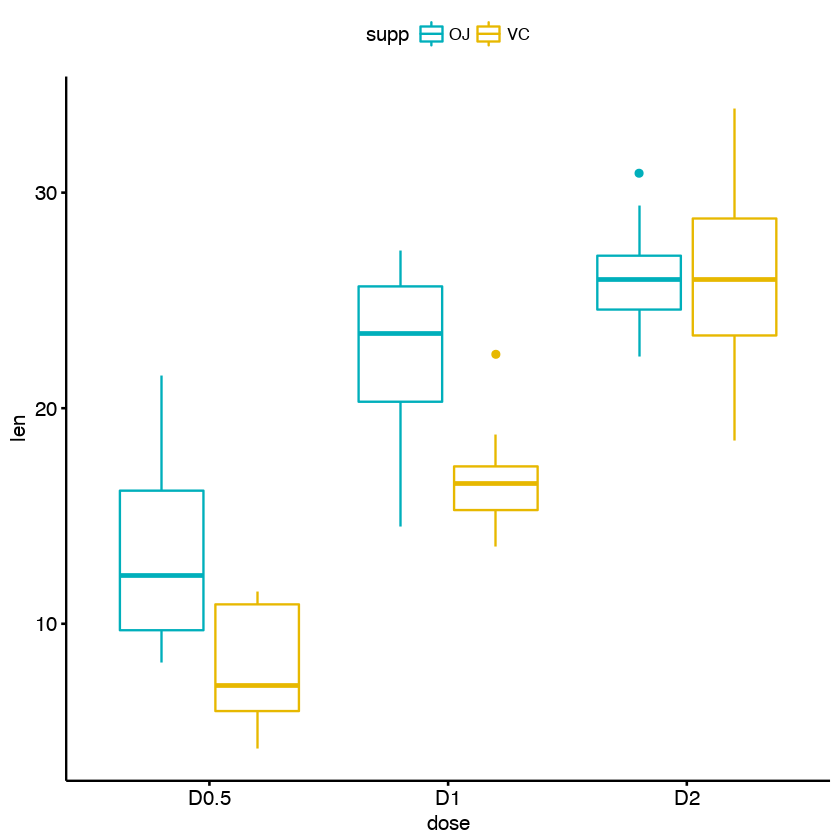

In [10]:
# 2개 변수에 대한 박스상자 
# 치근의 용량에 대한 표시 (dose)
# 용법에 따른 색깔 표시  (supp)
ggboxplot(my_data, x = "dose", y = "len", color="supp", palette = c("#00AFBB", "#E7B800"))

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


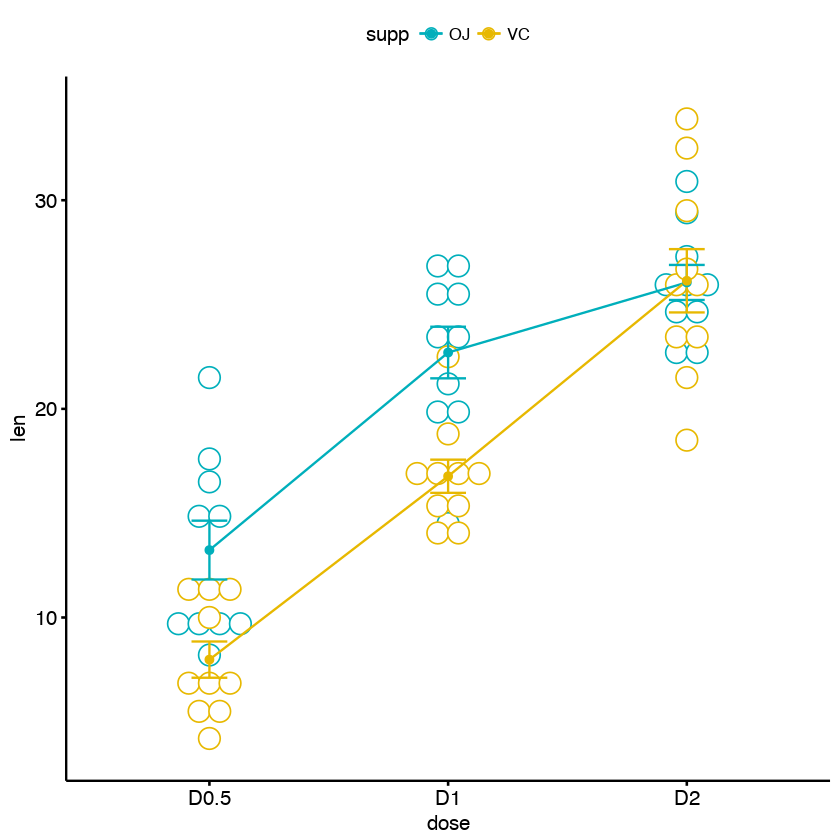

In [12]:
# 다중 그룹에 대한 라인 플롯
# 용량에 따른 치모근 의 길이 표시
# 용법 (supp) 에 대한 것은 상자 색깔 표시
# error 바 추가: mean_se
# 필요하면 mean_sd, mean_ci, median_iqr,.. 등도 추가

ggline(my_data, x = "dose", y = "len", color = "supp",
       add = c("mean_se", "dotplot"),
       palette = c("#00AFBB", "#E7B800"))

R 베이스 패키지로 사용할 수 도 있습니다.

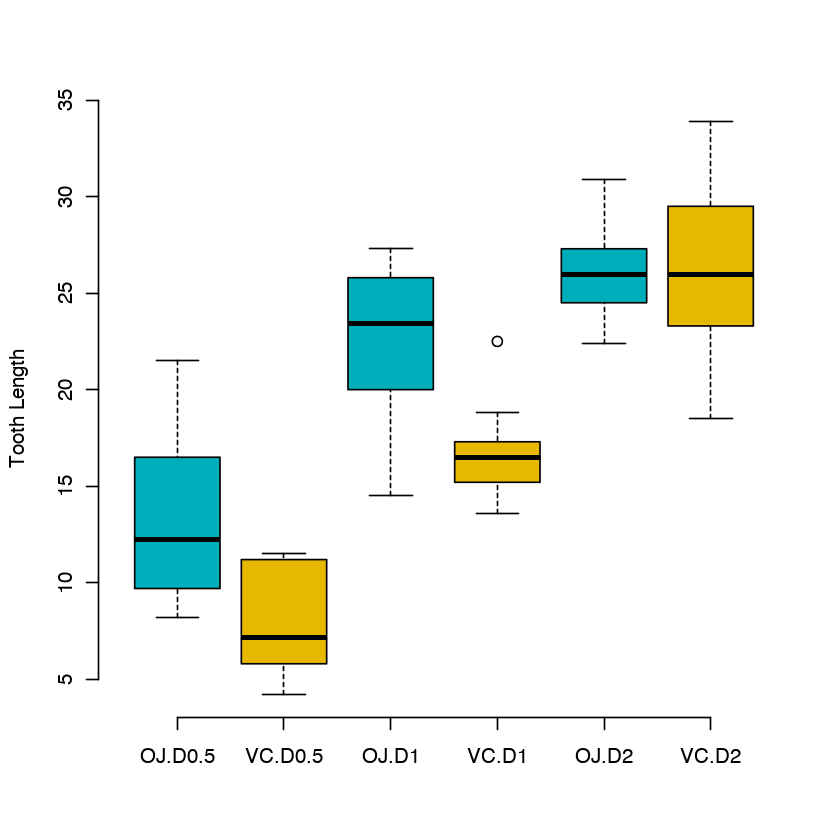

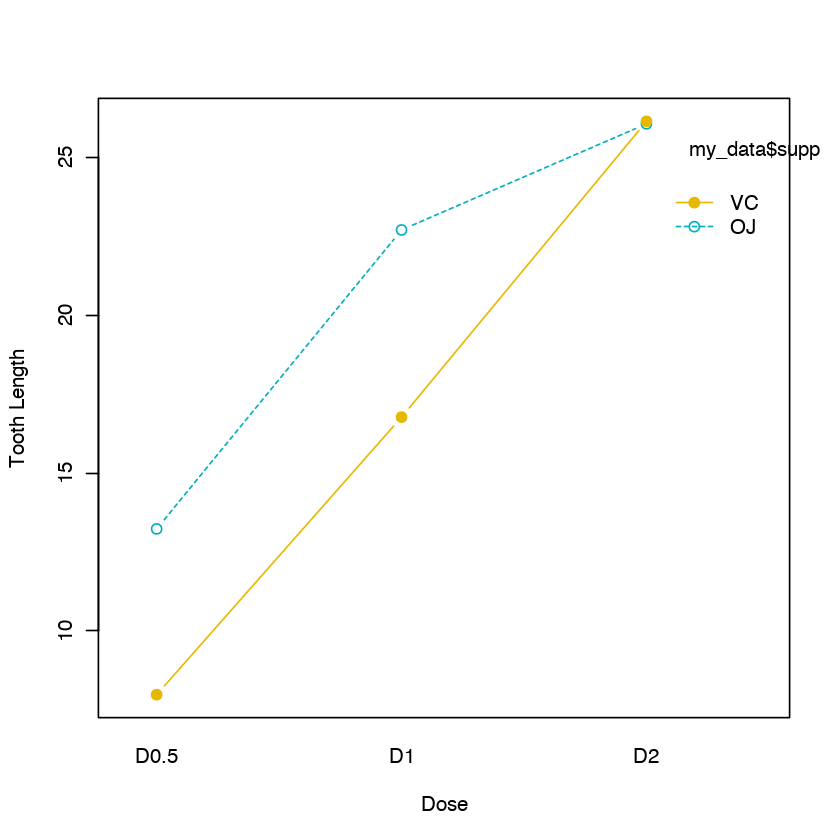

In [13]:
# Box plot with two factor variables
boxplot(len ~ supp * dose, data=my_data, frame = FALSE, 
        col = c("#00AFBB", "#E7B800"), ylab="Tooth Length")
# Two-way interaction plot
interaction.plot(x.factor = my_data$dose, trace.factor = my_data$supp, 
                 response = my_data$len, fun = mean, 
                 type = "b", legend = TRUE, 
                 xlab = "Dose", ylab="Tooth Length",
                 pch=c(1,19), col = c("#00AFBB", "#E7B800"))

### 이원 분산 분석 검정

In [15]:
res.aov2 <- aov(len ~ supp + dose, data = my_data)
summary(res.aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4   14.02 0.000429 ***
dose         2 2426.4  1213.2   82.81  < 2e-16 ***
Residuals   56  820.4    14.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

F 값을 살펴보면 supp, dose 각각 14.02, 82.81 이고 이들의 P 값은 각각 0.05 보다 상당히 작다. 따라서  supp, dose 모두 통계적으로 유의미 합니다. 단순하게 살펴보면 용량 용법 모두다 치아 모근 성장에 영향을 주고 있음을 알 수 있습니다. 

In [16]:
# Two-way ANOVA with interaction effect
# These two calls are equivalent
res.aov3 <- aov(len ~ supp * dose, data = my_data)
res.aov3 <- aov(len ~ supp + dose + supp:dose, data = my_data)
summary(res.aov3)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

이 결과를 보면 용법, 용량 뿐 아니라 서로 상호작용도 통계적으로 유의미 한 것을 알 수 있습니다.

### 결과 해석

p 값 과 유의수준 0.05 를 기준으로 하여 해석을 하면 다음과 같습니다.
* 용법의 p 값은 0,000429 입니다. 이것은 치아 모근 성장에서 통계적 차이를 가져 옵니다.
* 용량의 p 값은 < 2e-16 입니다 역시 용량도 치아 모근 성장에서 통계적 차이를 가져옵니다.
* supp * dose 의 p 값은 0.02 입니다. 이것 역시 용량과 치아 모근 성장의 관계는 용법에 따라 차이가 있음을 보여 줍니다.

### 통계량들 계산

In [20]:
# %>% 연산은 pipe 역할을 하는 연산자이며, dplyr 패키지에 들어가 있습니다.
require(dplyr)
group_by(my_data, supp, dose) %>%
  summarise(count = n(), 
           mean = mean(len, na.rm = T),
           sd = sd(len, na.rm = T)
  )

supp,dose,count,mean,sd
OJ,D0.5,10,13.23,4.459709
OJ,D1,10,22.70,3.910953
OJ,D2,10,26.06,2.655058
VC,D0.5,10,7.98,2.746634
VC,D1,10,16.77,2.515309
VC,D2,10,26.14,4.797731


In [21]:
# model.tables() 를 사용할 수 있습니다.
model.tables(res.aov3, type="means", se=T)

Tables of means
Grand mean
         
18.81333 

 supp 
supp
    OJ     VC 
20.663 16.963 

 dose 
dose
  D0.5     D1     D2 
10.605 19.735 26.100 

 supp:dose 
    dose
supp D0.5  D1    D2   
  OJ 13.23 22.70 26.06
  VC  7.98 16.77 26.14

Standard errors for differences of means
          supp   dose supp:dose
        0.9376 1.1484    1.6240
replic.     30     20        10

### Multiple pairwise-comparison between the means of groups

분산 분석에서 각 범주형 변수들이 통계적으로 의미를 갖는 다고 알고 있으면 이제는 각 범주형 변수들의 수준간에 어떤 관계가 있는지 확인을 해야 합니다. 따라서 각 수준간 쌍으로 비교를 하여 그룹간에 어떤 차이가 있는지 확인해 보고자 합니다.

#### Tukey HSD (Tukey multiple pairwise-comparisons : Honest Significant Difference) 

용법에 관련해서는 Tukey HSD 를 할 필요가 없습니다. 왜냐하면 용법은 2개이 수준을 가지고 있으므로 이미 수준별 차이를 알 수 있습니다.

In [22]:
TukeyHSD(res.aov3, which = "dose")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp + dose + supp:dose, data = my_data)

$dose
          diff       lwr       upr   p adj
D1-D0.5  9.130  6.362488 11.897512 0.0e+00
D2-D0.5 15.495 12.727488 18.262512 0.0e+00
D2-D1    6.365  3.597488  9.132512 2.7e-06


* **diff** : 두 그룹의 평균 들의 차이
* **lwr, upr** : 95\% 신뢰구간의 상한 하한
* **p adj** : 비교후에 P 값

#### Multiple comparisons using multcomp package


In [25]:
library(multcomp)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



In [26]:
summary(glht(res.aov2, linfct = mcp(dose = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = len ~ supp + dose, data = my_data)

Linear Hypotheses:
               Estimate Std. Error t value Pr(>|t|)    
D1 - D0.5 == 0    9.130      1.210   7.543   <1e-04 ***
D2 - D0.5 == 0   15.495      1.210  12.802   <1e-04 ***
D2 - D1 == 0      6.365      1.210   5.259   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


#### Pairwise t-test

In [27]:
pairwise.t.test(my_data$len, my_data$dose,
                p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  my_data$len and my_data$dose 

   D0.5    D1     
D1 1.0e-08 -      
D2 4.4e-16 1.4e-05

P value adjustment method: BH 

### ANOVA 가정 확인

#### 등분산성 확인 (Check the homogeneity of variance assumption)

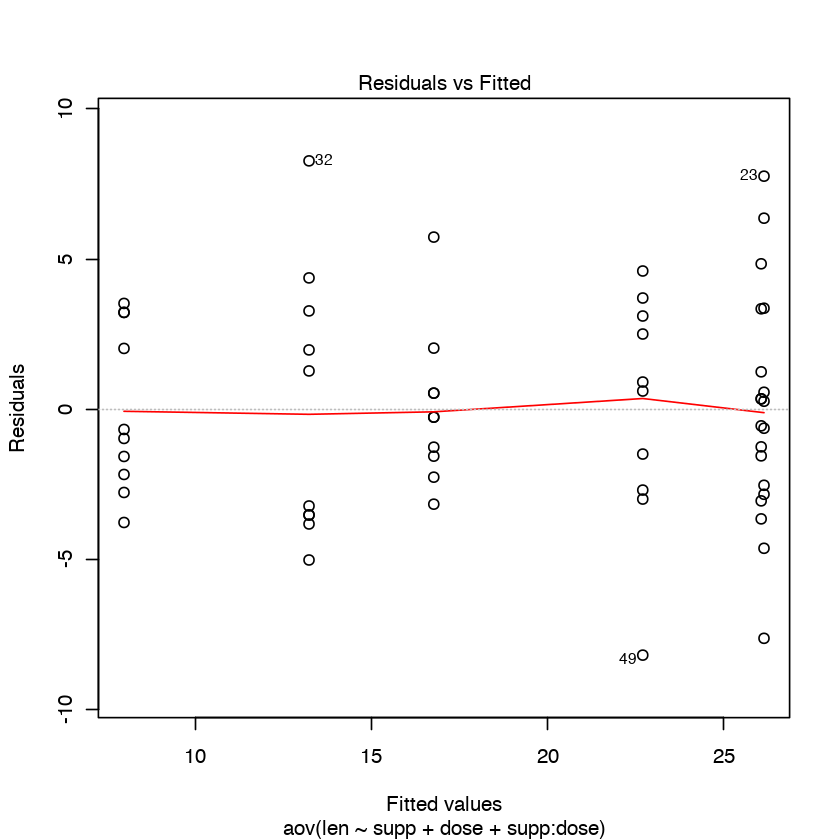

In [28]:
# 1. 등분산성 확인
plot(res.aov3,1)

그림에서 보면 23 과 32 는 outlier 로서 관측된다. 이것은 등분산성과, 정규성에 많은 영향을 미치기 때문에 가정에서 만나는 outlier 는 제거 하는것을 권고 합니다.

Levene's test 를 시행해 봅니다. 이것은 car package 에 있습니다.

In [29]:
library(car)


Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



In [32]:
leveneTest(len ~ supp*dose, data = my_data)

,Df,F value,Pr(>F)
group,5,1.708578,0.1483606
,54,NA,NA


p 값이 0.05 보다 크므로 그룹간에 통계적으로 차이가 없음을 의마합니다. 따라서 서로 다른 그룹사이에 분산이 등분산이라고 가정 할 수 있습니다.

#### Check the normality assumpttion

정규성 검정

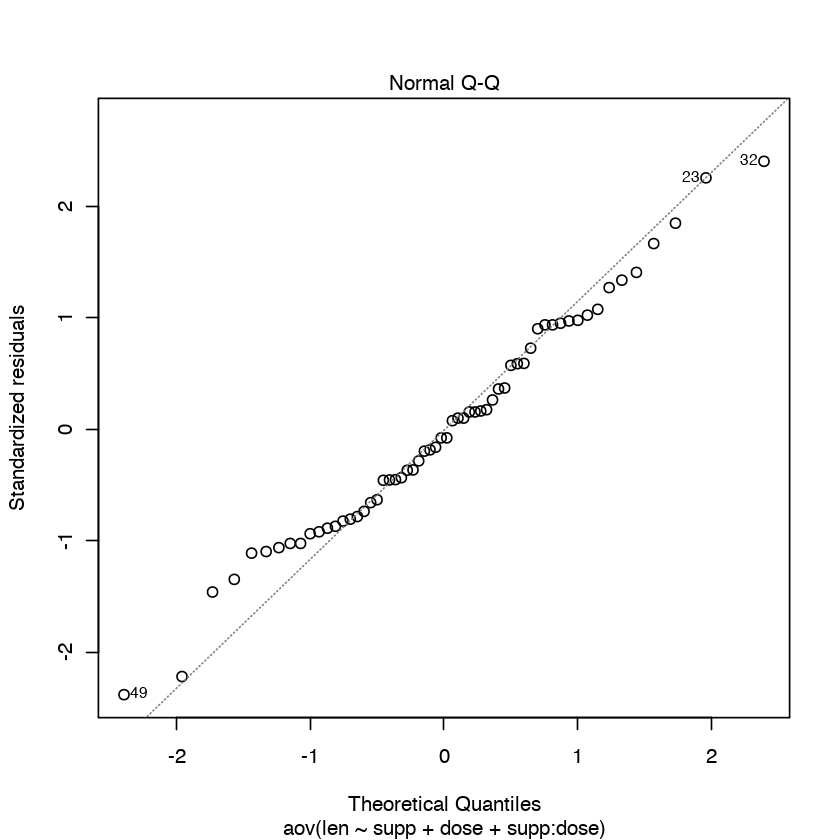

In [33]:
# 2. Normality
plot (res.aov3,2)

점이 대략적으로 직선을 따라서 가므로 데이터가 정규분포를 가지고 있다고 할 수 있습니다.

ANOVA 잔차에 대한 (W = 0.98, p = 0.5) 에 대한 Shapiro-Wilk 검정을 시행해보면, 정규분포를 의반한다는 증거가 없음을 알 수 있습니다.

In [34]:
# 잔차 추출
aov_residuals <- residuals(object = res.aov3)

# Shapiro-Wilk test
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98499, p-value = 0.6694


즉 0.05 보다 크므로 정규성이 없다는 증거는 없습니다.

### Compute two-way ANOVA test in R for unbalanced designs

unbalanced design 이란, 각 그룹사이 관측치가 같지 않을 경우에 시행하는 것입니다. unbalanced design 에서 anova 는 3가지 형태가 있습니다. Type-I, -II, -III 입니다. 여기서는 단순히 type-III 을 적용합니다.

In [35]:
require(car)

In [36]:
my_anova <- aov(len ~ supp * dose, data = my_data)
Anova(my_anova, type = "III")

,Sum Sq,Df,F value,Pr(>F)
(Intercept),1750.3290,1,132.729911,3.602548e-16
supp,137.8125,1,10.450516,2.092470e-03
dose,885.2647,2,33.565433,3.363190e-10
supp:dose,108.3190,2,4.106991,2.186027e-02
Residuals,712.1060,54,NA,NA
